In [22]:
import toolsets.denoising_related_functions as drf
from toolsets.file_io import save_df, read_df, read_msp_files
from toolsets.spectra_plotter import head_to_tail_plot
%load_ext autoreload
%autoreload 2

# this is the example run of the spectral denoising

In [16]:
sample_data = read_msp_files('sample_data/sample_spectra.msp')

reading in spec
done reading in spec
checking spectrum


In [17]:
instance = sample_data.iloc[0]

In [18]:
instance

spectrum            [[55.057948948792394, 26.0], [60.9874975576574...
Name                                                          Inosine
InChIKey                                  UGQMRVRMYYASKQ-KQYNXXCUSA-N
SMILES              O=c1[nH]cnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C...
RETENTIONTIME                                                    0.56
reference_rt                                                  [0.547]
Spectrum_type                                                     MS2
PrecursorMZ                                        291.06943510065264
Formula                                                    C10H12N4O5
ExactMass                                          268.08076948400003
Precursor_type                                                [M+Na]+
Ion_mode                                                            P
Comment                            Major_ms1intensity+18878.0_ei_0.89
Spectrum_entropy                                   0.8710286751819204
Num peaks           

In [14]:
denoised_msms = drf.spectral_denoising(instance['spectrum'], smiles=instance['SMILES'], adduct=instance['Precursor_type'])

# head to tail plot of the denoised spectra against raw spectra

entropy similarity is 0.5915051698684692


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

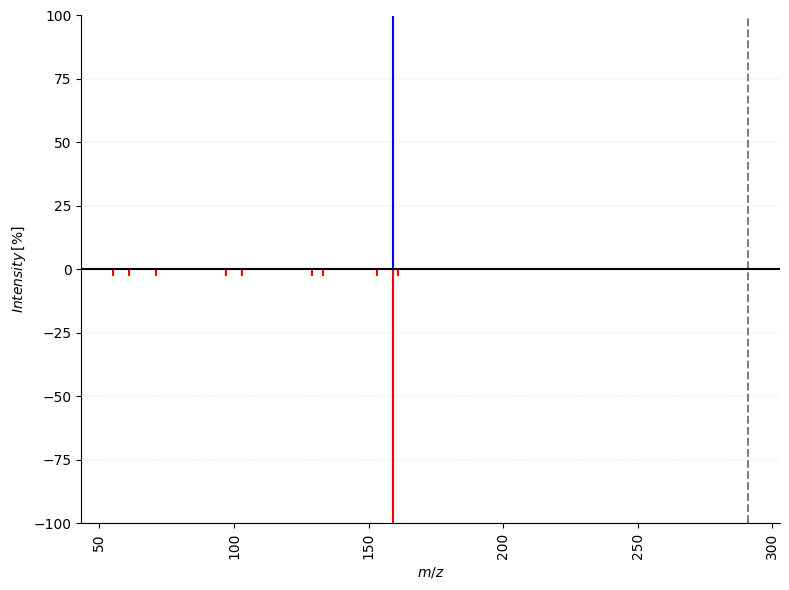

In [25]:
head_to_tail_plot(denoised_msms, instance['spectrum'], pmz = float(instance['PrecursorMZ']))

# this is the example run of denoising search
# even msp files are supported, saving and exporting dataset files with read_df and save_df functions are recommended for easier data management (in csv)

In [47]:
from tqdm import tqdm

In [49]:
library

,precursor_mz,CAS,reference_adduct,reference_mz,comment,reference_smiles,reference_formula,reference_mix,reference_rt,reference_name,rt_apex,rt_start,rt_end,ms1_intensity,n_scnas,ms1_scan_range,reci_snr,msms,ms2_scan_idx,pmz_offset,msms_denoised,ei
0,291.069435,58-63-9,[M+Na]+,291.069990,Major,O=c1[nH]cnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C...,C10H12N4O5,Alkaloids-pos-mix1,[0.547],Inosine,0.560556,0.513533,0.711283,18878.0,50.0,"[136, 143, 187]",0.004769,"[[51.940033, 26.0], [55.05795, 26.0], [60.9875...",277.0,6.592364e-04,"[[55.05795, 26.0], [60.9875, 26.0], [71.0848, ...",0.889195
1,113.033490,66-22-8,[M+H]+,113.034554,Major,O=c1cc[nH]c(=O)[nH]1,C4H4N2O2,Alkaloids-pos-mix1,[0.356],Uracil,0.356150,0.328383,0.497367,38906.0,30.0,"[103, 107, 134]",0.003643,"[[40.01855, 937.0], [40.553856, 26.0], [40.902...",198.0,0.000000e+00,"[[40.01855, 937.0], [41.02887, 62.0], [42.0363...",0.801460
2,244.092623,65-46-3,[M+H]+,244.092797,Major,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1,C9H13N3O5,Alkaloids-pos-mix1,[0.328],Cytidine,0.327497,0.294233,0.513533,209224.0,37.0,"[98, 103, 136]",0.000337,"[[40.01855, 382.0], [40.52437, 26.0], [41.0414...",152.0,1.767334e-04,"[[40.01855, 382.0], [41.041454, 92.0], [42.036...",0.976548
3,137.046177,68-94-0,[M+H]+,137.045787,Major,O=c1nc[nH]c2nc[nH]c12,C5H4N4O,Alkaloids-pos-mix1,"[0.36, 0.549, 0.454]",Hypoxanthine,0.360444,0.328383,0.399033,222341.0,10.0,"[103, 108, 114]",0.056759,"[[40.01944, 373.0], [40.92377, 26.0], [41.0414...",199.0,1.447695e-03,"[[40.01944, 373.0], [41.041454, 31.0], [42.010...",0.910923
4,159.026448,68-94-0,[M+Na]+,159.027731,Major,O=c1nc[nH]c2nc[nH]c12,C5H4N4O,Alkaloids-pos-mix1,"[0.36, 0.549, 0.454]",Hypoxanthine,0.360643,0.335217,0.417717,22945.0,13.0,"[104, 108, 118]",0.100502,"[[41.039658, 31.0], [43.018234, 31.0], [44.015...",190.0,2.842171e-14,"[[43.018234, 31.0], [46.99576, 242.0], [48.992...",0.707647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,142.121188,135-97-7,[M+H]+,142.122641,Major,CN1[C@H]2CC[C@@H]1CC(O)C2,C8H15NO,Alkaloids-pos-mix47,[0.314],Pseudotropine,0.311508,0.273300,0.578917,973460.0,71.0,"[94, 100, 166]",0.000086,"[[41.037754, 3316.0], [42.032608, 4428.0], [43...",151.0,1.858050e-03,"[[41.037754, 3316.0], [42.032608, 4428.0], [43...",0.921236
561,176.069709,942-24-5,[M+H]+,176.070605,Major,COC(=O)c1c[nH]c2ccccc12,C10H9NO2,Alkaloids-pos-mix47,[3.324],Methyl indole-3-carboxylate,3.324701,3.273933,3.682433,403029.0,78.0,"[864, 872, 943]",0.000210,"[[40.21135, 26.0], [40.427883, 26.0], [41.0360...",1346.0,7.981105e-04,"[[41.036022, 123.0], [42.032677, 26.0], [43.02...",0.975902
562,414.337014,126-17-0,[M+H]+,414.336656,Major,C[C@H]1[C@H]2[C@H](C[C@H]3[C@@H]4CC=C5C[C@@H](...,C27H43NO2,Alkaloids-pos-mix47,[3.806],Solasodine,3.803279,3.762400,4.438150,4913936.0,135.0,"[969, 977, 1105]",0.000049,"[[40.446503, 9.0], [40.72455, 9.0], [40.916424...",1546.0,3.114387e-03,"[[41.037697, 1311.0], [41.235714, 10.0], [42.0...",0.983799
563,352.116991,19716-60-0,[M+H]+,352.117949,Major,COc1cc2c(cc1OC)-c1cc3ccc4c(c3c(=O)n1CC2)OCO4,C20H17NO5,Alkaloids-pos-mix47,[3.862],8-Oxoepiberberine,3.861753,3.820217,4.134783,9863.0,55.0,"[980, 986, 1036]",0.011646,"[[72.934265, 26.0], [99.02277, 26.0], [101.060...",1590.0,1.020874e-03,"[[99.02277, 26.0], [101.060844, 26.0], [105.01...",0.873212


In [53]:
search_result = drf.denoising_search(msms = instance['spectrum'], pmz =float(instance['PrecursorMZ']), library= library, 
                          pmz_col= 'precursor_mz', smiles_col='reference_smiles', adduct_col='reference_adduct', 
                          spectrum_col='msms')

In [54]:
search_result

,precursor_mz,CAS,reference_adduct,reference_mz,comment,reference_smiles,reference_formula,reference_mix,reference_rt,reference_name,rt_apex,rt_start,rt_end,ms1_intensity,n_scnas,ms1_scan_range,reci_snr,msms,ms2_scan_idx,pmz_offset,msms_denoised,ei,processed_formulas,charge,entropy_raw,entropy_denoised
0,291.069435,58-63-9,[M+Na]+,291.06999,Major,O=c1[nH]cnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C...,C10H12N4O5,Alkaloids-pos-mix1,[0.547],Inosine,0.560556,0.513533,0.711283,18878.0,50.0,"[136, 143, 187]",0.004769,"[[159.02953, 1058.0], [291.0575, 62.0]]",277.0,0.000659,"[[159.02953, 1058.0], [291.0575, 62.0]]",0.889195,C10H12N4NaO5,1,0.591505,1.0
